# **1. 双色激光场构造
$E_{\omega}^{p}(t)=\frac{1}{\sqrt{1+\epsilon_{\omega}}}E_{\omega}e^{-2ln(2)(\frac{t-t_{0}}{\sigma})^{2}}cos(\omega t)\\
E_{\omega}^{s}(t)=\frac{\epsilon_{\omega}}{\sqrt{1+\epsilon_{\omega}}}E_{\omega}e^{-2ln(2)(\frac{t-t_{0}}{\sigma})^{2}}sin(\omega t)\\
E_{2\omega}^{p}(t)=\frac{1}{\sqrt{1+\epsilon_{2\omega}}}E_{2\omega}e^{-2ln(2)(\frac{t-t_{0}}{\sigma})^{2}}cos(2\omega t)\\ 
E_{2\omega}^{s}(t)=\frac{\epsilon_{2\omega}}{\sqrt{1+\epsilon_{2\omega}}}E_{2\omega}e^{-2ln(2)(\frac{t-t_{0}}{\sigma})^{2}}cos(2\omega t\pm \frac{\pi}{2}) \\  when \ '-',Co-rotating;\ '+',\ Counter-rotating.$ 

In [1]:
%pylab
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
E1=0.0534            # 基频光电场强度，对应光强10^14 W/CM^2
k=1                  #倍频光对基频光光强比，0<k<1
E2=sqrt(k)*E1
omega=0.057          # 基频光800nm频率
sigma=8*41.34        # FWHM of Gauss pulse
epf=1                # Epliticity of FW
epd=1                # Epliticity of DF
phi=0                #relative phase
def E_FW_P(t):           # define the FW of P
    return (1/sqrt(1+epf**2))*E1*exp(-2*log(2)*(t/sigma)**2)*cos(omega*t)
def E_FW_S(t):           # define the FW of S
    return (epf/sqrt(1+epf**2))*E1*exp(-2*log(2)*(t/sigma)**2)*sin(omega*t)
def E_DF_P(t):           # define the DF of P
    return (1/sqrt(1+epd**2))*E2*exp(-2*log(2)*(t/sigma)**2)*cos(2*omega*t+phi)
def E_DF_S(t):           # define the DF of S
    return (epd/sqrt(1+epd**2))*E2*exp(-2*log(2)*(t/sigma)**2)*sin(2*omega*t+phi)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


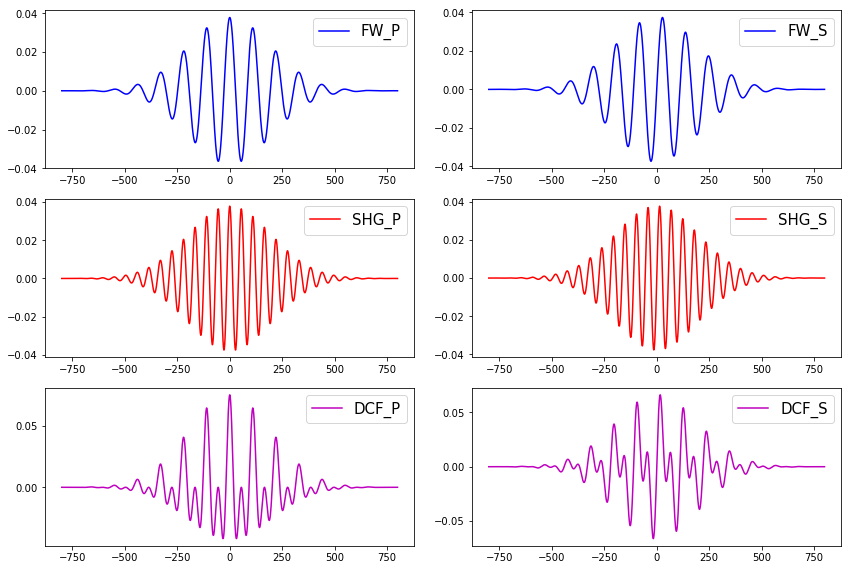

In [2]:
dt=1
t=arange(-800,800,1)
co_dcf_p=E_FW_P(t)+E_DF_P(t)
co_dcf_s=E_FW_S(t)+E_DF_S(t)
counter_dcf_p=E_FW_P(t)+E_DF_P(t)
counter_dcf_s=E_FW_S(t)-E_DF_S(t)

Size=15
figsize(12,8)
subplot(3,2,1)
plot(t,E_FW_P(t),"b",label='FW_P',linestyle='-')
legend(prop={'size': Size})
subplot(3,2,2)
plot(t,E_FW_S(t),"b",label='FW_S',linestyle='-')
legend(prop={'size': Size})
subplot(3,2,3)
plot(t,E_DF_P(t),"r",label='SHG_P',linestyle='-')
legend(prop={'size': Size})
subplot(3,2,4)
plot(t,E_DF_S(t),"r",label='SHG_S',linestyle='-')
legend(prop={'size': Size})
subplot(3,2,5)
plot(t,co_dcf_p,"m",label='DCF_P',linestyle='-')
legend(prop={'size': Size})
subplot(3,2,6)
plot(t,co_dcf_s,"m",label='DCF_S',linestyle='-')
legend(prop={'size': Size})
matplotlib.rc('xtick',labelsize=Size)
matplotlib.rc('ytick',labelsize=Size)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
savefig('figsave/laser_field',dpi=512, bbox_inches='tight')

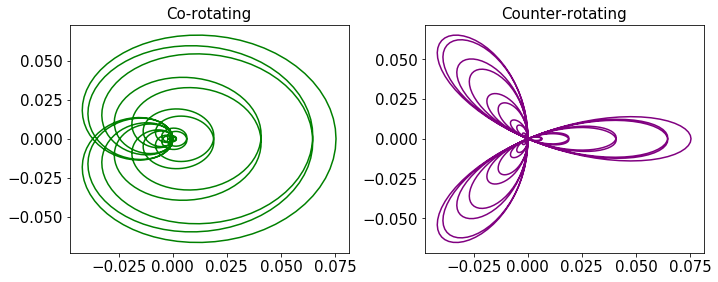

In [3]:
figsize(10,4)
subplot(121)
plot(E_FW_P(t)+E_DF_P(t),E_FW_S(t)+E_DF_S(t),"g",linestyle='-')
title("Co-rotating",size=Size)
subplot(122)
plot(E_FW_P(t)+E_DF_P(t),E_FW_S(t)-E_DF_S(t),"purple",linestyle='-')
title("Counter-rotating",size=Size)
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

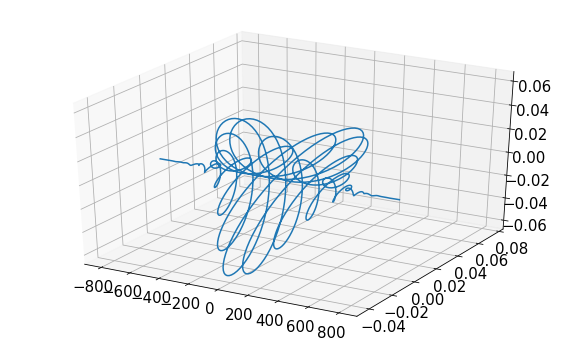

In [4]:
from mpl_toolkits.mplot3d import Axes3D
figsize(10,6)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t,E_FW_P(t)+E_DF_P(t),E_FW_S(t)-E_DF_S(t))

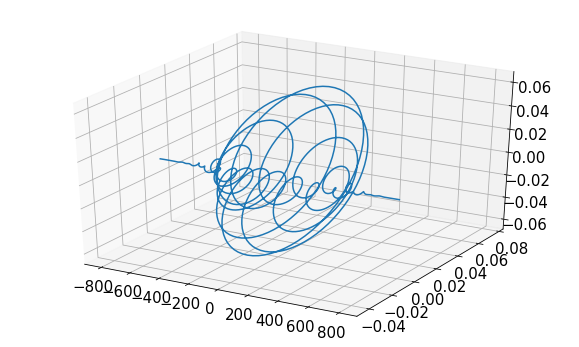

In [5]:
figsize(10,6)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t,E_FW_P(t)+E_DF_P(t),E_FW_S(t)+E_DF_S(t))

In [6]:
Co_dcf=zeros(t.size,dtype=complex)
Counter_dcf=zeros(t.size,dtype=complex)
Co_dcf.real=co_dcf_p
Co_dcf.imag=co_dcf_s
Counter_dcf.real=counter_dcf_p
Counter_dcf.imag=counter_dcf_s
co_theta=angle(Co_dcf)
co_abs=abs(Co_dcf)
counter_theta=angle(Counter_dcf)
counter_abs=abs(Counter_dcf)

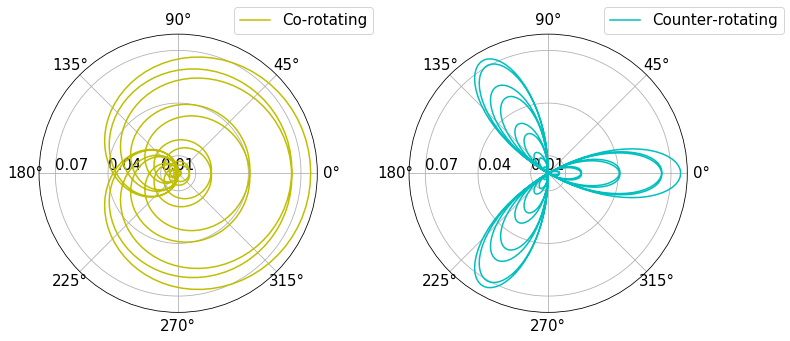

In [7]:
figsize(10,5)
subplot(121,polar=True)
plot(co_theta,co_abs,linewidth=1.5,color="y",label="Co-rotating")
plt.rgrids(arange(0.01,1.1*max(co_abs),0.03),angle=180)
legend(loc=(0.7,1),prop={'size': Size})
subplot(122,polar=True)
plot(counter_theta,counter_abs,linewidth=1.5,color="c",label="Counter-rotating")
legend(loc=(0.7,1),prop={'size': Size})
plt.rgrids(arange(0.01,1.1*max(counter_abs),0.03),angle=180)
plt.tight_layout(pad=1.0, w_pad=4)
savefig('figsave/DCF',dpi=512, bbox_inches='tight')

# **2. 根据圆偏双色场，算出失势 
$\ 失势是一效果量,反映了电子在电场作用下，其动量最终的变化量，类似于冲量定理\\ 
A(t_{i})=-\int_{t_{i}}^{\infty}E(t)dt^{'} \    (这里初速度设定为0)$

In [8]:
co_A_P=zeros(t.size)         #共旋失势P分量
co_A_S=zeros(t.size)         #共旋失势S分量
counter_A_P=zeros(t.size)    #反旋失势P分量
counter_A_S=zeros(t.size)    #反旋失势S分量
for i in xrange(t.size):           #失势是一效果量
    for j in xrange(t.size - i):
        co_A_P[i]=co_A_P[i]+co_dcf_p[i+j]*dt
        co_A_S[i]=co_A_S[i]+co_dcf_s[i+j]*dt
        counter_A_P[i]=counter_A_P[i]+counter_dcf_p[i+j]*dt
        counter_A_S[i]=counter_A_S[i]+counter_dcf_s[i+j]*dt

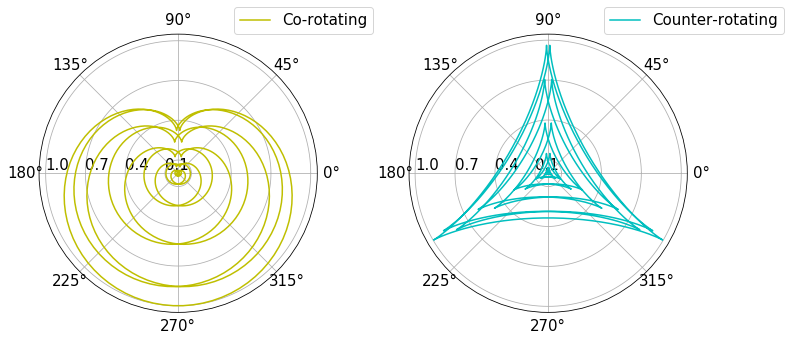

In [9]:
co_A=zeros(t.size,dtype=complex)
counter_A=zeros(t.size,dtype=complex)
co_A.real=-co_A_P
co_A.imag=-co_A_S
counter_A.real=-counter_A_P
counter_A.imag=-counter_A_S
co_A_theta=angle(co_A)
co_A_abs=abs(co_A)
counter_A_theta=angle(counter_A)
counter_A_abs=abs(counter_A)
figsize(10,5)
subplot(121,polar=True)
plot(co_A_theta,co_A_abs,linewidth=1.5,color="y",label="Co-rotating")
plt.rgrids(arange(0.1,1.1*max(co_A_abs),0.3),angle=180)
legend(loc=(0.7,1),prop={'size': Size})
subplot(122,polar=True)
plot(counter_A_theta,counter_A_abs,linewidth=1.5,color="c",label="Counter-rotating")
plt.rgrids(arange(0.1,1.1*max(counter_A_abs),0.3),angle=180)
legend(loc=(0.7,1),prop={'size': Size})
plt.tight_layout(pad=1.0, w_pad=4)
savefig('figsave/Veotor_potential',dpi=512, bbox_inches='tight')

# **3. 根据双色激光场算出轨迹
$轨迹是一过程量，反映电子在电场作用下位移量随时间的实时变化情况，t_{i}时刻电离的电子，之后的轨迹积分函数为:\\ 
T(t)=\int_{t^{'}}^{t}dt\int_{t_{i}}^{t^{'}}-E(t)dt$

In [10]:
ini_t=400
co_v_p=zeros(t.size-ini_t)         #共旋速度velocity p分量
co_v_s=zeros(t.size-ini_t)         #共旋速度velocity s分量
counter_v_p=zeros(t.size-ini_t)    #反旋速度velocity p分量
counter_v_s=zeros(t.size-ini_t)    #反旋速度velocity s分量
co_t_p=zeros(t.size-ini_t)         #共旋轨迹trajectory p分量
co_t_s=zeros(t.size-ini_t)         #共旋轨迹trajectory s分量
counter_t_p=zeros(t.size-ini_t)    #反旋轨迹trajectory p分量
counter_t_s=zeros(t.size-ini_t)    #反旋轨迹trajectory s分量

for i in xrange(co_v_p.size-1):
    co_v_p[i+1]=co_v_p[i]-co_dcf_p[i+ini_t-1]*dt
    co_v_s[i+1]=co_v_s[i]-co_dcf_s[i+ini_t-1]*dt
    counter_v_p[i+1]=counter_v_p[i]-counter_dcf_p[i+ini_t-1]*dt
    counter_v_s[i+1]=counter_v_s[i]-counter_dcf_s[i+ini_t-1]*dt
for j in xrange(co_t_p.size-1):
    co_t_p[j+1]=co_t_p[j]+co_v_p[j]*dt
    co_t_s[j+1]=co_t_s[j]+co_v_s[j]*dt
    counter_t_p[j+1]=counter_t_p[j]+counter_v_p[j]*dt
    counter_t_s[j+1]=counter_t_s[j]+counter_v_s[j]*dt


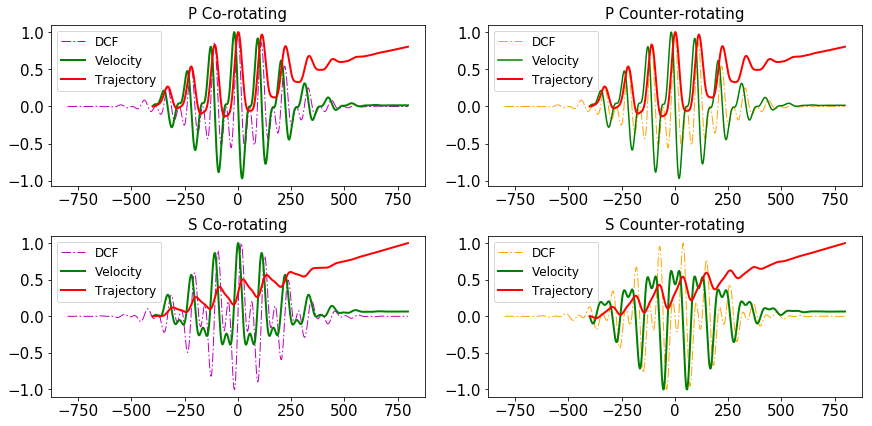

In [11]:
figsize(12,6)
subplot(221)
plot(t,co_dcf_p/max(abs(co_dcf_p)),color='m',linewidth=1,linestyle='-.',label='DCF')
plot(t[ini_t:],co_v_p/max(abs(co_v_p)),color='g',linewidth=2,label='Velocity')
plot(t[ini_t:],co_t_p/max(abs(co_t_p)),color='r',linewidth=2,label='Trajectory')
legend(prop={'size': 12})
title('P Co-rotating',size=Size)
subplot(223)
plot(t,co_dcf_s/max(abs(co_dcf_s)),color='m',linewidth=1,linestyle='-.',label='DCF')
plot(t[ini_t:],co_v_s/max(abs(co_v_s)),color='g',linewidth=2,label='Velocity')
plot(t[ini_t:],co_t_s/max(abs(co_t_s)),color='r',linewidth=2,label='Trajectory')
legend(prop={'size': 12})
title('S Co-rotating',size=Size)
subplot(222)
plot(t,counter_dcf_p/max(abs(counter_dcf_p)),color='orange',linewidth=1,linestyle='-.',label='DCF')
plot(t[ini_t:],counter_v_p/max(abs(counter_v_p)),color='g',label='Velocity')
plot(t[ini_t:],counter_t_p/max(abs(counter_t_p)),color='r',linewidth=2,label='Trajectory')
legend(prop={'size': 12})
title('P Counter-rotating',size=Size)
subplot(224)
plot(t,counter_dcf_s/max(abs(counter_dcf_s)),color='orange',linewidth=1,linestyle='-.',label='DCF')
plot(t[ini_t:],counter_v_s/max(abs(counter_v_s)),color='g',linewidth=2,label='Velocity')
plot(t[ini_t:],counter_t_s/max(abs(counter_t_s)),color='r',linewidth=2,label='Trajectory')
legend(prop={'size':12})
title('S Counter-rotating',size=Size)
plt.tight_layout(pad=1.0, w_pad=3.0, h_pad=1.0)
savefig('figsave/component_analysis',dpi=512, bbox_inches='tight')

In [12]:
co_v=zeros(t.size-ini_t,dtype=complex)
counter_v=zeros(t.size-ini_t,dtype=complex)
co_t=zeros(t.size-ini_t,dtype=complex)
counter_t=zeros(t.size-ini_t,dtype=complex)
co_v.real=co_v_p
co_v.imag=co_v_s
counter_v.real=counter_v_p
counter_v.imag=counter_v_s
co_t.real=co_t_p
co_t.imag=co_t_s
counter_t.real=counter_t_p
counter_t.imag=counter_t_s
co_v_theta=angle(co_v)
co_v_abs=abs(co_v)
co_t_theta=angle(co_t)
co_t_abs=abs(co_t)
counter_v_theta=angle(counter_v)
counter_v_abs=abs(counter_v)
counter_t_theta=angle(counter_t)
counter_t_abs=abs(counter_t)

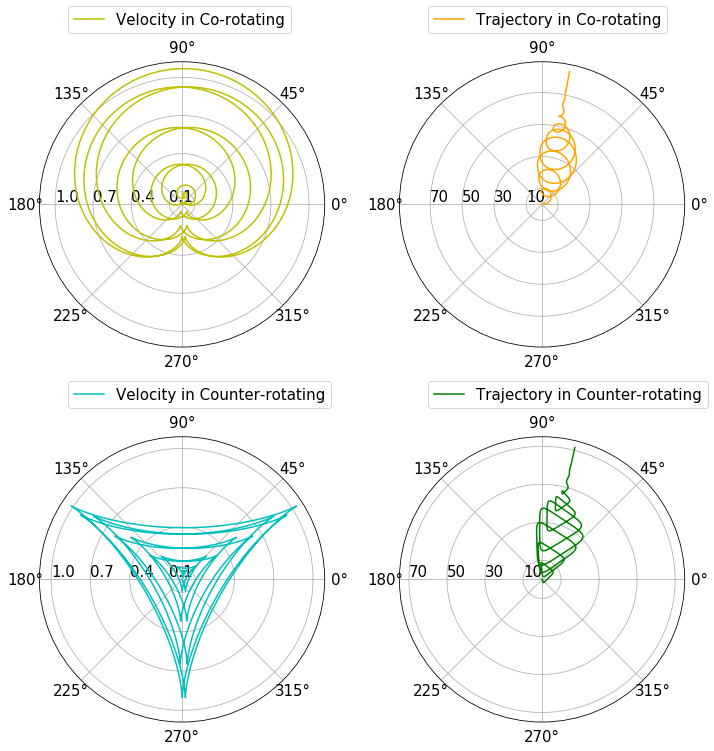

In [13]:
figsize(10,10)

subplot(221,polar=True)
plot(co_v_theta,co_v_abs,linewidth=1.5,color="y",label="Velocity in Co-rotating")
plt.rgrids(arange(0.1,1.1*max(co_v_abs),0.3),angle=180)
legend(loc=(0.1,1.1),prop={'size': Size})

subplot(223,polar=True)
plot(counter_v_theta,counter_v_abs,linewidth=1.5,color="c",label="Velocity in Counter-rotating")
plt.rgrids(arange(0.1,1.1*max(counter_v_abs),0.3),angle=180)
legend(loc=(0.1,1.1),prop={'size': Size})

subplot(222,polar=True)
plot(co_t_theta,co_t_abs,linewidth=1.5,color="orange",label="Trajectory in Co-rotating")
plt.rgrids(arange(10,80,20),angle=180)
legend(loc=(0.1,1.1),prop={'size': Size})

subplot(224,polar=True)
plot(counter_t_theta,counter_t_abs,linewidth=1.5,color="g",label="Trajectory in Counter-rotating")
plt.rgrids(arange(10,75,20),angle=180)
legend(loc=(0.1,1.1),prop={'size': Size})
plt.tight_layout(pad=1.0, w_pad=2.0, h_pad=5.0)
savefig('figsave/V+T_in_plane',dpi=512, bbox_inches='tight')

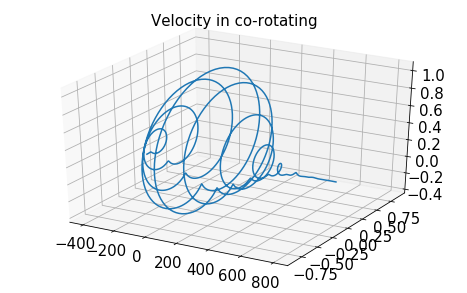

In [14]:
figsize(8,5)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t[ini_t:],co_v_p,co_v_s)
title('Velocity in co-rotating',size=Size)

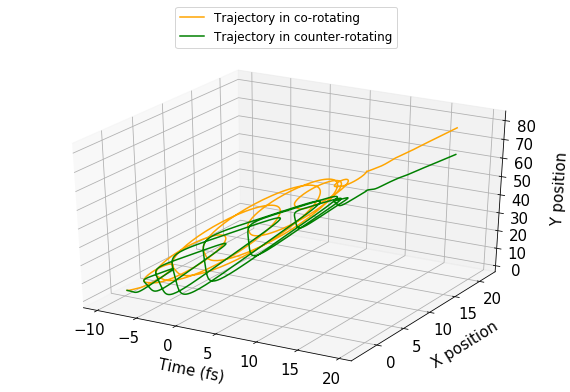

In [15]:
figsize(8,5)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t[ini_t:]/41.34,co_t_p,co_t_s,color='orange',label='Trajectory in co-rotating')
ax.plot(t[ini_t:]/41.34,counter_t_p,counter_t_s,color='g',label='Trajectory in counter-rotating')
ax.legend(loc=(0.3,1),prop={'size': 12})
ax.set_xlabel('Time (fs)',fontsize=Size,labelpad = 12.5)
ax.set_ylabel('X position',fontsize=Size,labelpad = 12.5)
ax.set_zlabel('Y position',fontsize=Size,labelpad = 12.5)
plt.tight_layout(pad=1.0)
savefig('figsave/Trajectory_in_corotating',bbox_inches='tight',dpi=512)

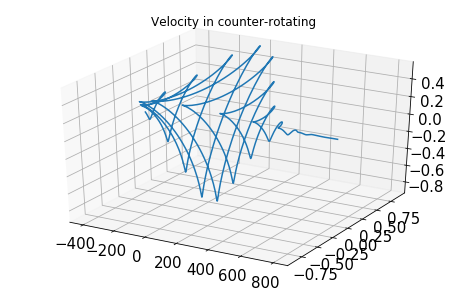

In [16]:
figsize(8,5)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t[ini_t:],counter_v_p,counter_v_s)
title('Velocity in counter-rotating')

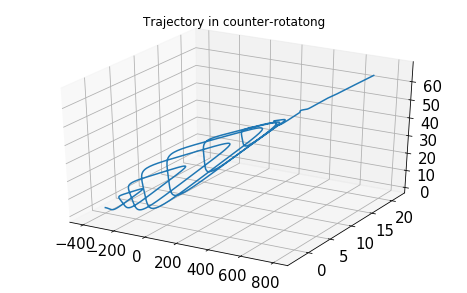

In [17]:
figsize(8,5)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t[ini_t:],counter_t_p,counter_t_s)
title('Trajectory in counter-rotatong')